In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore') 
sns.set_palette("pastel")
sns.set(style='whitegrid')

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df['species'] = iris.target
df['species'] = df['species'].map({0:'seotsa', 1:'versicolor', 2:'virginica'})
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,seotsa
1,4.9,3.0,1.4,0.2,seotsa
2,4.7,3.2,1.3,0.2,seotsa
3,4.6,3.1,1.5,0.2,seotsa
4,5.0,3.6,1.4,0.2,seotsa


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
x = df.drop('species', axis=1)
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=22)

x_train.shape

(105, 4)

In [6]:
y_train.shape

(105,)

In [7]:
x_test.shape

(45, 4)

In [8]:
y_test.shape

(45,)

In [9]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
print("The accuracy of Logistic Regression is ", metrics.accuracy_score(lr_predict, y_test))

The accuracy of Logistic Regression is  0.9555555555555556


In [10]:
lr1 = LogisticRegression(max_iter=1000)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=22)
score = cross_val_score(lr1, x, y, cv=cv)
print("The accuracy of Logistic Regression 1 is ", score.mean())
print("Standard Deviation is ", score.std())

The accuracy of Logistic Regression 1 is  0.9555555555555555
Standard Deviation is  0.014054567378526117


In [11]:
# SVM Model 
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_predict = svm_model.predict(x_test)
print("The accuracy of SVM is ", metrics.accuracy_score(svm_predict, y_test))

The accuracy of SVM is  0.9333333333333333


In [12]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
detr = DecisionTreeClassifier()
detr.fit(x_train, y_train)
detr_predict = detr.predict(x_test)
print("The accuracy of Decision Tree is ", metrics.accuracy_score(detr_predict, y_test))

The accuracy of Decision Tree is  0.9111111111111111


In [13]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train, y_train)
dt_model_predict = dt_model.predict(x_test)
print("The accuracy of Decision Tree 1 is ", metrics.accuracy_score(dt_model_predict, y_test))

The accuracy of Decision Tree 1 is  0.9333333333333333


In [14]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)
print("The accuracy of Naive Bayes Classification is ", metrics.accuracy_score(nb_predict, y_test))

The accuracy of Naive Bayes Classification is  0.9555555555555556


In [15]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)
print("The accuracy of Random Forest is ", metrics.accuracy_score(rfc_predict, y_test))

The accuracy of Random Forest is  0.9555555555555556


In [16]:
rfc1 = RandomForestClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(rfc1, x, y, cv=cv)
print("The accuracy of Logistic Regression 1 is ", score.mean())
print("Standard Deviation is ", score.std())

The accuracy of Logistic Regression 1 is  0.9333333333333333
Standard Deviation is  0.034426518632954824


In [17]:
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etc_predict = etc.predict(x_test)
print("The accuracy of Random Forest is ", metrics.accuracy_score(etc_predict, y_test))

The accuracy of Random Forest is  0.9555555555555556


In [18]:
# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train, y_train)
xg_model_predict = xg_model.predict(x_test)
print("The accuracy of XGBoost is ", metrics.accuracy_score(xg_model_predict, y_test))
print(xg_model.score(x_test, y_test))

[08:48:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGBoost is  0.9333333333333333
0.9333333333333333


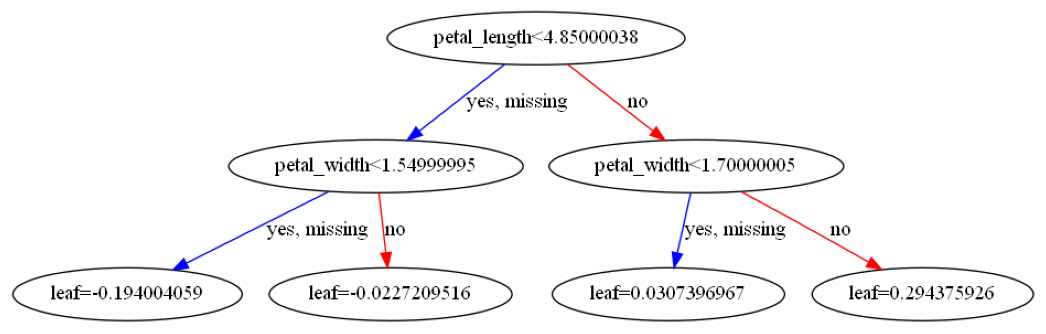

In [19]:
from xgboost import plot_tree
xgb1 = xgb.XGBClassifier(verbosity=0)
xgb1_train = xgb1.fit(x_train, y_train)
xgb1_predict = xgb1_train.predict(x_test)
xgb_acc = xgb1.score(x_test, y_test)
plot_tree(xgb1, num_trees=5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=22)
score = cross_val_score(knn, x, y, cv=cv)
print(score.mean(), score.std())

0.9644444444444444 0.010886621079036308


In [21]:
from sklearn.metrics import accuracy_score, f1_score
scores = []
errors = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    scores.append((i, round(f1_score(y_test, pred, average='weighted'), 4)))
    error = 1-round(accuracy_score(y_test, pred), 4)
    errors.append((i, error))
    
scores_res = pd.DataFrame(scores, columns=['K', 'f1 Score'])
error_res = pd.DataFrame(errors, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

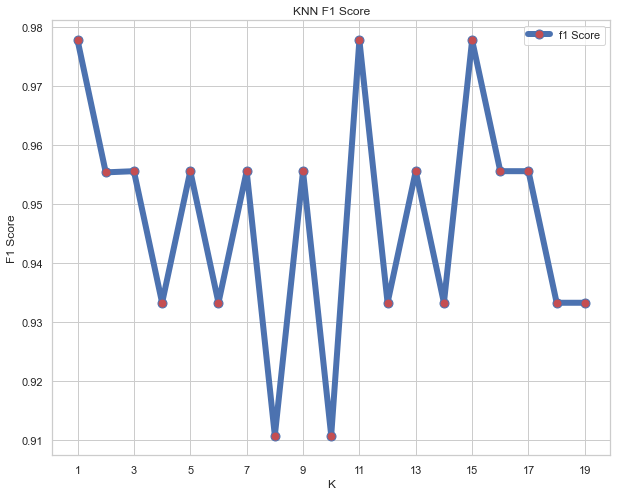

In [22]:
# Checking f1 Score
ax = scores_res.set_index('K').plot(figsize=[10, 8], linewidth=6, marker='o', mfc='r', markersize=9)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, 20, 2))
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

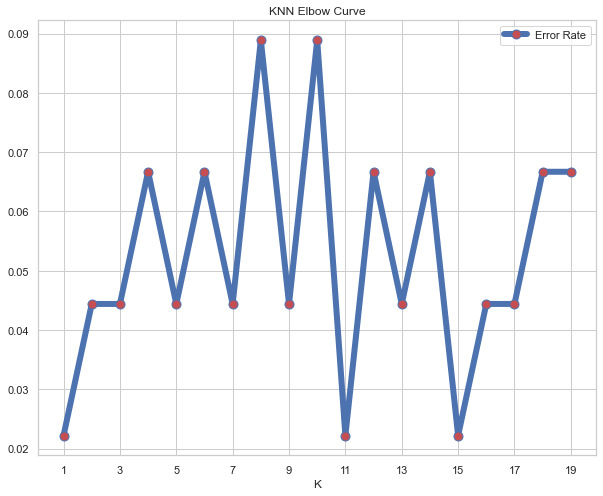

In [23]:
# Checking Elbow Curve
ax = error_res.set_index('K').plot(figsize=(10, 8), linewidth=6, marker='o', markersize=9, mfc='r')
ax.set_xticks(range(1, 20, 2))
plt.title('KNN Elbow Curve')

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(knn, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.03


In [25]:
# KNN cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df['species'] = LabelEncoder().fit_transform(df['species'])

In [26]:
val = df.iloc[:, [0, 1, 2, 3]].values

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(val)
    inertia.append(kmeans.inertia_)

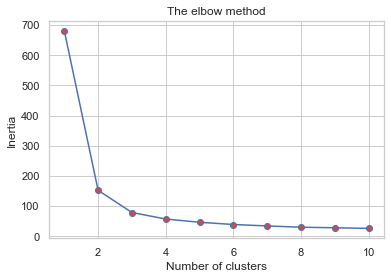

In [27]:
plt.plot(range(1, 11), inertia, marker='o', mfc='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(val)
labels = y_kmeans.predict(val)

In [29]:
def display_cluster(X,km,num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plt.figure(figsize=[10, 8])
    for i in range(num_clusters):
        plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=150, label=labels[i])
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = 'black', marker = 'o', s = 200)
    plt.legend()

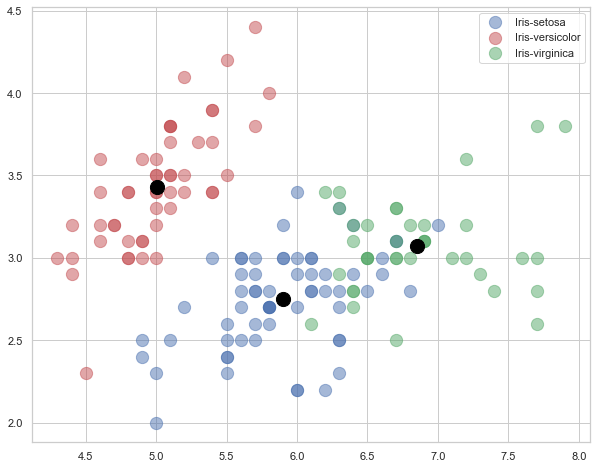

In [30]:
display_cluster(X=val, km=kmeans, num_clusters=3)

In [31]:
# DL
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [32]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [33]:
x = StandardScaler().fit_transform(x)
y = LabelBinarizer().fit_transform(y)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)

In [35]:
shallow_model = Sequential()
shallow_model.add(Dense(4, input_dim=4, activation='relu'))
shallow_model.add(Dense(units=10, activation='relu'))
shallow_model.add(Dense(units=3, activation='softmax'))
shallow_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
shallow_history = shallow_model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
4/4 [==============================] - 0s 28ms/step - loss: 0.6878 - accuracy: 0.2857 - val_loss: 0.6820 - val_accuracy: 0.4222
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.2667 - val_loss: 0.6790 - val_accuracy: 0.4222
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.2762 - val_loss: 0.6760 - val_accuracy: 0.4222
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.2762 - val_loss: 0.6729 - val_accuracy: 0.4222
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.3048 - val_loss: 0.6697 - val_accuracy: 0.4222
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.3333 - val_loss: 0.6665 - val_accuracy: 0.4222
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.3810 - val_loss: 0.6633 - val_accuracy: 0.4222
Epoch 8/150
4/4 [=========

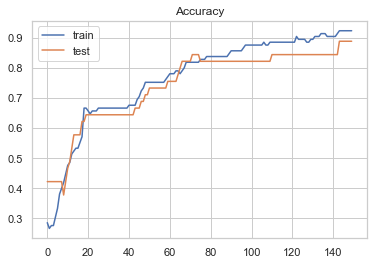

In [37]:
plt.plot(shallow_history.history['accuracy'])
plt.plot(shallow_history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

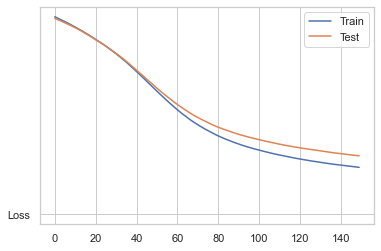

In [38]:
plt.plot(shallow_history.history['loss'])
plt.plot(shallow_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

In [39]:
deep_model = Sequential()
deep_model.add(Dense( 4, input_dim=4, activation = 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 3, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
deep_history = deep_model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
4/4 [==============================] - 0s 30ms/step - loss: 1.1065 - accuracy: 0.2667 - val_loss: 1.1009 - val_accuracy: 0.3556
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.3333 - val_loss: 1.0970 - val_accuracy: 0.3556
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.3333 - val_loss: 1.0967 - val_accuracy: 0.3556
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0966 - accuracy: 0.3333 - val_loss: 1.0961 - val_accuracy: 0.3778
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 1.0958 - accuracy: 0.3714 - val_loss: 1.0944 - val_accuracy: 0.4222
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 1.0937 - accuracy: 0.4190 - val_loss: 1.0914 - val_accuracy: 0.4000
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0913 - accuracy: 0.4000 - val_loss: 1.0884 - val_accuracy: 0.3556
Epoch 8/150
4/4 [=========

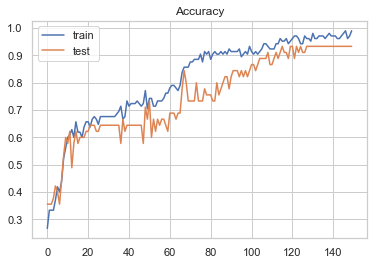

In [41]:
plt.plot(deep_history.history['accuracy'])
plt.plot(deep_history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

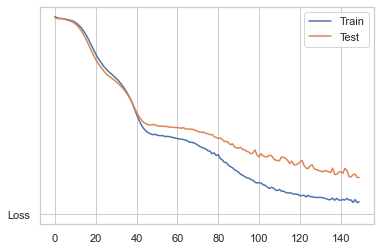

In [42]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()